In [152]:
# import libraries to import and analyze the data
import pandas as pd
import numpy as np
import seaborn as sns

## Assumptions
Each airplane is dedicated to one round trip route between the 2 airports
#### Costs:
- Fuel, Oil, Maintenance, Crew - $8 per mile total

- Depreciation, Insurance, Other - $1.18 per mile total

- Airport operational costs for the right to use the airports and related services are fixed at $\$5,000$ for medium airports and $10,000 for large airports. There is one charge for each airport where a flight lands. Thus, a round trip flight has a total of
two airport charges.

- For each individual departure, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs.

- For each individual arrival, the first 15 minutes of delays are free, otherwise each minute costs the airline $75 in added operational costs.

#### Revenue:

- Each plane can accommodate up to 200 passengers and each flight has an
associated occupancy rate provided in the Flights data set. Do not use the
Tickets data set to determine occupancy.

- Baggage fee is $\$35$ for each checked bag per flight. We expect 50% of passengers to check an average of 1 bag per flight. The fee is charged separately for each leg of a round trip flight, thus 50% of passengers will be charged a total of $70 in baggage fees for a round trip flight.

- Disregard seasonal effects on ticket prices (i.e. ticket prices are the same in April
as they are on Memorial Day or in December)

### Import data

In [153]:
# Load data into our notebook
flights = pd.read_csv("flights.csv")
airports = pd.read_csv("airport_codes.csv")
tickets = pd.read_csv("tickets.csv")

C:\Users\sirid\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [154]:
# Check initial shapes of files
print("Shape of flights data: ",flights.shape)
print("Shape of airports data: ",airports.shape)
print("Shape of tickets data: ",tickets.shape)

Shape of flights data:  (1915886, 16)
Shape of airports data:  (55369, 8)
Shape of tickets data:  (1167285, 12)


### Description of datasets : 

### Flights data
FL_DATE:Flight Date (yyyy-mm-dd)

OP_CARRIER:Operating commercial carrier Flight code

TAIL_NUM:Tail Number is the aircraft registration number for the aircraft used (similar to VIN number for cars).

OP_CARRIER_FL_NUM:Operating commercial carrier Flight number.

ORIGIN_AIRPORT_ID:Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. 

ORIGIN: Origin Airport, International Air Transport Association (IATA) Airport Code.

ORIGIN_CITY_NAME: Origin Airport, City Name.

DEST_AIRPORT_ID: Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.

DESTINATION: Destination Airport, Operating commercial carrier Flight code (IATA )Airport Code

DEST_CITY_NAME:	Destination Airport, City Name

DEP_DELAY: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.

ARR_DELAY: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

CANCELLED: Cancelled Flight Indicator (1=Flight is cancelled).  Cancelled flights should be excluded

AIR_TIME: Flight Time, in Minutes

DISTANCE: Distance between Origin and Destination Airports in Miles

OCCUPANCY_RATE: Occupancy rate of the flight


### Airports data
TYPE: The type of the airport, valid value like: small_airport, medium_airport, heliport, etc. 

NAME: The name of the airport

ELEVATION_FT: Elevation of the airport from the sea level

CONTINENT: The continent airport belongs to

ISO_COUNTRY: The country of the airport

MUNICIPALITY: The city or town of the airport 

IATA_CODE: An airport code is a three-letter geocode designating many airports and metropolitan areas around the world, defined 
by the International Air Transport Association (IATA). 

COORDINATES: Longitude and latitude coordinates of the airport

### Tickets data
ITIN_ID: Unique identifier for the itinerary

YEAR: Year of the Itinerary

QUARTER: Quarter Number (1-4) for the Itinerary

ORIGIN: Origin Airport Code, International Air Transport Association Airport Code (IATA) which is unique for each airport

ORIGIN_COUNTRY: Country of the Origin Airport

ORIGIN_STATE_ABR: Origin Airport, State abbrevations.

ORIGIN_STATE_NM: Origin Airport, State Full Name

ROUNDTRIP: Round Trip Indicator (1= Round Trip and 0 = One Way).  Consider only round trips for your analysis.

REPORTING_CARRIER: 2 character Reporting Airline Carrier codes

PASSENGERS: Number of Passengers on the itinerary

ITIN_FARE: Itinerary Fare Per Person. Itinerary fare represents the whole round trip fare if ROUNDTRIP = 1. If ROUNDTRIP = 0, 
then the itinerary fare represents the one-way ticket fare.

DESTINATION: Destination Airport Code, International Air Transport Association Airport Code (IATA) which is unique for each 
airport

In [155]:
# Sneak peak to get to know the data
flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [156]:
airports.head()

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [157]:
tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


## Clean the data
#### Clean flights data

### Explore each column 

Deal with outliers,missing values


In [158]:
flights['CANCELLED'].value_counts()

0.0    1864272
1.0      51614
Name: CANCELLED, dtype: int64

In [159]:
# remove the cancelled flights since we will not be using these flights for analysis
flights = flights[flights['CANCELLED']==0]

In [160]:
flights.isnull().sum()
# for the purpose of this challenge we do not require tail_num as it does not provide any usefull insight
# we are removing airport id's as we have ORIGIN and DESTINATION in the data set (redundant data)
# we do not need air_time as we will be calculating the operational cost from the miles travelled. 
flights = flights.drop(['TAIL_NUM', 'AIR_TIME','OP_CARRIER_FL_NUM','CANCELLED','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID'],axis=1)
flights.isnull().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DESTINATION            0
DEST_CITY_NAME         0
DEP_DELAY              0
ARR_DELAY           4377
DISTANCE             610
OCCUPANCY_RATE       310
dtype: int64

In [161]:
flights.dtypes

FL_DATE              object
OP_CARRIER           object
ORIGIN               object
ORIGIN_CITY_NAME     object
DESTINATION          object
DEST_CITY_NAME       object
DEP_DELAY           float64
ARR_DELAY           float64
DISTANCE             object
OCCUPANCY_RATE      float64
dtype: object

In [162]:
# convert data types for storage effeciency
flights['ORIGIN'] = flights['ORIGIN'].astype(str)
flights['DESTINATION'] = flights['DESTINATION'].astype(str)
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
flights['OP_CARRIER'] = flights['OP_CARRIER'].astype(str)
flights['ORIGIN_CITY_NAME'] = flights['ORIGIN_CITY_NAME'].astype(str)
flights['DEST_CITY_NAME'] = flights['DEST_CITY_NAME'].astype(str)

In [163]:
# Let's start with DISTANCE column, are there nulls in this column 
flights[flights['DISTANCE'].isnull()]

,FL_DATE,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
1910858,2019-03-22,AA,BWI,"Baltimore, MD",DFW,"Dallas/Fort Worth, TX",0.0,-19.0,NaN,0.383346
1910859,2019-03-23,AA,BWI,"Baltimore, MD",DFW,"Dallas/Fort Worth, TX",-6.0,-21.0,NaN,0.943554
1910860,2019-03-24,AA,BWI,"Baltimore, MD",DFW,"Dallas/Fort Worth, TX",-4.0,1.0,NaN,0.775109
1910863,2019-03-27,AA,BWI,"Baltimore, MD",DFW,"Dallas/Fort Worth, TX",-3.0,-34.0,NaN,0.983999
1910864,2019-03-28,AA,BWI,"Baltimore, MD",DFW,"Dallas/Fort Worth, TX",-1.0,-2.0,NaN,0.657254
...,...,...,...,...,...,...,...,...,...,...
1915498,2019-03-02,AA,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",32.0,52.0,NaN,0.787472
1915499,2019-03-03,AA,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",-1.0,45.0,NaN,0.905306
1915500,2019-03-04,AA,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",-4.0,-22.0,NaN,0.646339
1915501,2019-03-05,AA,ATL,"Atlanta, GA",LAX,"Los Angeles, CA",-6.0,-10.0,NaN,0.773823


In [164]:
# Distance is very important for us as we will calculate the number of flights which are departing on the same route
# Are there other routes which have values for the same origin and destinaion?, use JFK -> ORD as an example
flights[(flights['ORIGIN'] == 'JFK') & (flights['DESTINATION'] == 'ORD')]
# since we have the same routes which have distances present the missing data can be filled in by these records. 

,FL_DATE,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
17200,2019-03-13,OO,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-15.0,740.0,0.730000
17214,2019-03-13,OO,JFK,"New York, NY",ORD,"Chicago, IL",-5.0,-9.0,740.0,0.920000
19554,2019-03-14,OO,JFK,"New York, NY",ORD,"Chicago, IL",0.0,-6.0,740.0,0.620000
19568,2019-03-14,OO,JFK,"New York, NY",ORD,"Chicago, IL",114.0,170.0,740.0,0.500000
21148,2019-03-25,OO,JFK,"New York, NY",ORD,"Chicago, IL",9.0,-8.0,740.0,0.690000
...,...,...,...,...,...,...,...,...,...,...
1915529,2019-03-27,AA,JFK,"New York, NY",ORD,"Chicago, IL",-1.0,-12.0,****,0.937391
1915530,2019-03-28,AA,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-9.0,****,0.794303
1915531,2019-03-29,AA,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-13.0,****,0.595342
1915532,2019-03-30,AA,JFK,"New York, NY",ORD,"Chicago, IL",3.0,-14.0,****,0.881587


In [165]:
# Find all the strings in DISTANCE column. 
strings_in_distance = flights['DISTANCE'].apply(lambda x: isinstance(x, str) and not x.replace('.', '', 1).isdigit())

In [166]:
flights[strings_in_distance]['DISTANCE'].unique()
# most of these values can be coerced into a numric data type but the values 'Hundered','Twenty' and '****' cannot be coerced
non_numeric_strings = flights[strings_in_distance]['DISTANCE'].unique().tolist()
# create a list which contains all non numeric strings in the distance column-- this increases reusability when the data changes in real time. 

In [167]:
non_numeric_strings

['Hundred', 'Twenty', 'NAN', '-1947', '-198', '****']

In [168]:
# Replace the non numeric values to NaN so that we can fill the distances with similar route distances
flights['DISTANCE'] = flights['DISTANCE'].replace(non_numeric_strings, np.nan).astype(float)
# coerce all numbers to numeric data type
flights['DISTANCE'] = pd.to_numeric(flights['DISTANCE'], errors='coerce')
#For each group, the DISTANCE column is filled forward using fillna(method='ffill') and then backward using fillna(method='bfill').
#This method ensures that any missing distances are filled based on the existing distances within the same (ORIGIN, DESTINATION) pairs, if they exist.
flights['DISTANCE'] = flights.groupby(['ORIGIN', 'DESTINATION'])['DISTANCE'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [169]:
# Check if all the JFK -> ORD flights have the same distance
flights[(flights['ORIGIN'] == 'JFK') & (flights['DESTINATION'] == 'ORD')]

,FL_DATE,OP_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
17200,2019-03-13,OO,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-15.0,740.0,0.730000
17214,2019-03-13,OO,JFK,"New York, NY",ORD,"Chicago, IL",-5.0,-9.0,740.0,0.920000
19554,2019-03-14,OO,JFK,"New York, NY",ORD,"Chicago, IL",0.0,-6.0,740.0,0.620000
19568,2019-03-14,OO,JFK,"New York, NY",ORD,"Chicago, IL",114.0,170.0,740.0,0.500000
21148,2019-03-25,OO,JFK,"New York, NY",ORD,"Chicago, IL",9.0,-8.0,740.0,0.690000
...,...,...,...,...,...,...,...,...,...,...
1915529,2019-03-27,AA,JFK,"New York, NY",ORD,"Chicago, IL",-1.0,-12.0,740.0,0.937391
1915530,2019-03-28,AA,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-9.0,740.0,0.794303
1915531,2019-03-29,AA,JFK,"New York, NY",ORD,"Chicago, IL",-3.0,-13.0,740.0,0.595342
1915532,2019-03-30,AA,JFK,"New York, NY",ORD,"Chicago, IL",3.0,-14.0,740.0,0.881587


In [170]:
flights.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
ORIGIN_CITY_NAME       0
DESTINATION            0
DEST_CITY_NAME         0
DEP_DELAY              0
ARR_DELAY           4377
DISTANCE               0
OCCUPANCY_RATE       310
dtype: int64

In [171]:
# fill all na values in delays as 0, here we are assuming that the flights are on time .
flights['ARR_DELAY'].fillna(0,inplace=True)

In [172]:
flights.isna().sum()

FL_DATE               0
OP_CARRIER            0
ORIGIN                0
ORIGIN_CITY_NAME      0
DESTINATION           0
DEST_CITY_NAME        0
DEP_DELAY             0
ARR_DELAY             0
DISTANCE              0
OCCUPANCY_RATE      310
dtype: int64

In [173]:
# It is better to remove these rows as they are very less.
flights = flights.dropna()

In [174]:
flights.dtypes

FL_DATE             datetime64[ns]
OP_CARRIER                  object
ORIGIN                      object
ORIGIN_CITY_NAME            object
DESTINATION                 object
DEST_CITY_NAME              object
DEP_DELAY                  float64
ARR_DELAY                  float64
DISTANCE                   float64
OCCUPANCY_RATE             float64
dtype: object

In [175]:
# change data types to int
flights['DEP_DELAY'] = flights['DEP_DELAY'].round().astype(int)
flights['ARR_DELAY'] = flights['ARR_DELAY'].round().astype(int)
flights['DISTANCE'] = flights['DISTANCE'].round().astype(int)

In [176]:
flights.dtypes

FL_DATE             datetime64[ns]
OP_CARRIER                  object
ORIGIN                      object
ORIGIN_CITY_NAME            object
DESTINATION                 object
DEST_CITY_NAME              object
DEP_DELAY                    int32
ARR_DELAY                    int32
DISTANCE                     int32
OCCUPANCY_RATE             float64
dtype: object

Use the IQR values in DEP_DELAY and ARR_DELAY to remove outliers. 

1.DEP_DELAY - Departure delay

In [143]:
flights['DEP_DELAY'].describe()

count    1.863962e+06
mean     1.077062e+01
std      5.007016e+01
min     -6.300000e+01
25%     -6.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      2.941000e+03
Name: DEP_DELAY, dtype: float64

From the output we can can understand that the mean departure delay time is 10 minutes whereas the maximum departure delay time is 294 minutes. This means our data has outliers. To remove the outliers we can remove all values which have a departure delay time above and lower the inter-quartile range

In [149]:
# finding the 1st quartile
DEP_DELAY_q1 = np.quantile(flights['DEP_DELAY'], 0.25)
 
# finding the 3rd quartile
DEP_DELAY_q3 = np.quantile(flights['DEP_DELAY'], 0.75)
DEP_DELAY_med = np.median(flights['DEP_DELAY'])
 
# finding the iqr region
iqr = DEP_DELAY_q3-DEP_DELAY_q1
 
# finding upper and lower whiskers
upper_bound = DEP_DELAY_q3+(1.5*iqr)
lower_bound = DEP_DELAY_q1-(1.5*iqr)

In [150]:
# remove all records which have departure delays not in IQR.
flights = flights[flights['DEP_DELAY']<upper_bound]
flights = flights[flights['DEP_DELAY']>lower_bound]

9.0 -15.0


[Text(0.5, 1.0, 'Boxplot for departure delays after cleaning')]

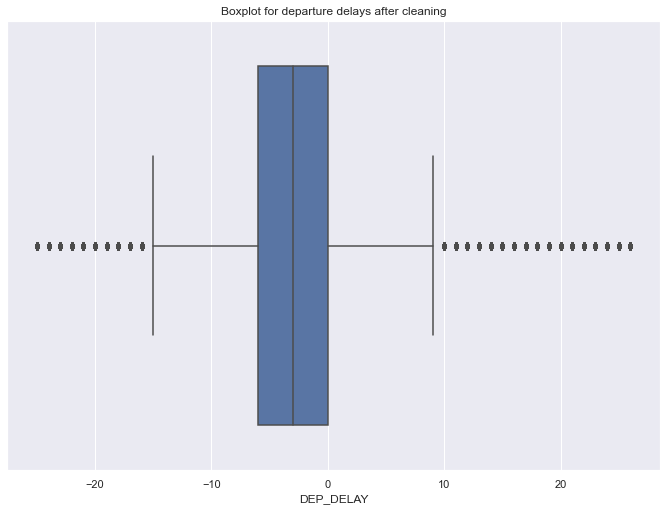

In [146]:
sns.boxplot(data = flights,x='DEP_DELAY').set(title='Boxplot for departure delays after cleaning')

2. ARR_DELAY - arrival delay

In [147]:
flights['ARR_DELAY'].describe()

count    1.617774e+06
mean    -6.781208e+00
std      1.564940e+01
min     -9.400000e+01
25%     -1.700000e+01
50%     -9.000000e+00
75%      1.000000e+00
max      1.439000e+03
Name: ARR_DELAY, dtype: float64

Using the same logic we used for departure delay, clean arrival delay column 

In [32]:
# remove all records which have departure delays more than 60 minutes. 
# the cost for the airline would become 60*75 
flights = flights[flights['ARR_DELAY']<upper_bound]
flights = flights[flights['ARR_DELAY']>lower_bound]

In [33]:
flights.shape

(1566407, 10)

In [34]:
# double check that distance column does not have empty values
flights['DISTANCE'].isnull().value_counts()

False    1566407
Name: DISTANCE, dtype: int64

In [35]:
# group the flights to show one record for each origin,destination,carrier pair
grouped_flights = flights.groupby(['ORIGIN', 'DESTINATION','DISTANCE']).agg({
    'DEP_DELAY': 'mean',
    'ARR_DELAY': 'mean',
    'OCCUPANCY_RATE': 'mean'
}).reset_index()

In [36]:
# Find the number of flights going on the same path
flight_counts = flights.groupby(['ORIGIN', 'DESTINATION', 'DISTANCE']).size().reset_index(name='num_flights')

In [37]:
grouped_flights = pd.merge(grouped_flights, flight_counts, on=['ORIGIN', 'DESTINATION', 'DISTANCE'])

In [38]:
flights = grouped_flights

In [39]:
flights.shape


(5954, 7)

In [40]:
flights.head()

,ORIGIN,DESTINATION,DISTANCE,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,num_flights
0,ABE,ATL,692,-1.800000,-7.162162,0.638432,185
1,ABE,CLT,481,-4.294118,-4.493213,0.659367,221
2,ABE,DTW,425,-2.570048,-8.850242,0.638357,207
3,ABE,FLL,1041,0.058824,-4.470588,0.543529,17
4,ABE,ORD,654,-6.309091,-15.381818,0.671182,110


[Text(0.5, 1.0, 'Distirbution of departure delay time')]

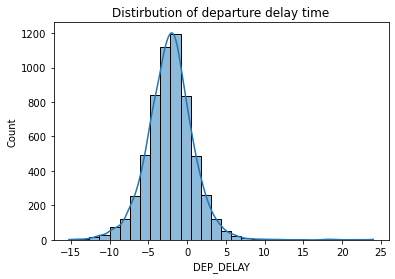

In [41]:
sns.histplot(flights['DEP_DELAY'], bins=30, kde=True).set(title='Distirbution of departure delay time')

The above visualisation is right-skewed which means most departures are before departure time.

#### Clean airports

In [42]:
print(airports.shape)
airports.head()


(55369, 8)


,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [43]:
# Continent does not provide us with any usefull insight as we are only considering US domestic flights so remove it.
airports = airports.drop(['CONTINENT'],axis =1)

In [44]:
# We are tring to enter the united states domestic market so remove all other countries and focus on large and medium airports
airports = airports[airports['ISO_COUNTRY'] =='US']
airports = airports[(airports['TYPE'] == 'medium_airport') | (airports['TYPE']=='large_airport')]
print("Shape of airports dataset after removing small and Non-US airports:",airports.shape)

Shape of airports dataset after removing small and Non-US airports: (858, 7)


In [45]:
# remove all invalid airports. 
airports = airports.dropna(subset = ['IATA_CODE'])
print("Shape of airports dataset after removing invalid airports:",airports.shape)

Shape of airports dataset after removing invalid airports: (821, 7)


In [46]:
airports.head()

,TYPE,NAME,ELEVATION_FT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
6194,medium_airport,Aleknagik / New Airport,66.0,US,Aleknagik,WKK,"-158.617996216, 59.2826004028"
26143,medium_airport,Lehigh Valley International Airport,393.0,US,Allentown,ABE,"-75.44080352783203, 40.652099609375"
26144,medium_airport,Abilene Regional Airport,1791.0,US,Abilene,ABI,"-99.68190002440001, 32.4113006592"
26145,large_airport,Albuquerque International Sunport,5355.0,US,Albuquerque,ABQ,"-106.609001, 35.040199"
26146,medium_airport,Aberdeen Regional Airport,1302.0,US,Aberdeen,ABR,"-98.42179870605469, 45.449100494384766"


In [47]:
airports['TYPE'].value_counts()

medium_airport    651
large_airport     170
Name: TYPE, dtype: int64

[Text(0.5, 1.0, 'Number of medium and large airports')]

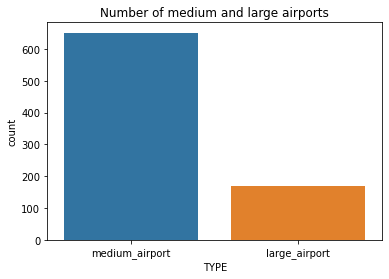

In [48]:
sns.countplot(data = airports,x = 'TYPE').set(title='Number of medium and large airports')

In [49]:
airports.dtypes

TYPE             object
NAME             object
ELEVATION_FT    float64
ISO_COUNTRY      object
MUNICIPALITY     object
IATA_CODE        object
COORDINATES      object
dtype: object

In [50]:
# we do not need elevation, iso_country and municipality as we do not get any usefull insights from these columns 
airports = airports.drop(['ELEVATION_FT','ISO_COUNTRY','MUNICIPALITY'],axis =1)

In [51]:
# check the shape of the cleaned dataframe
print("Shape of cleaned airports table",airports.shape)

Shape of cleaned airports table (821, 4)


#### Clean tickets

In [52]:
tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [53]:
# change data types for columns 

tickets['ORIGIN'] = tickets['ORIGIN'].astype(str)
tickets['ORIGIN_STATE_ABR'] = tickets['ORIGIN_STATE_ABR'].astype(str)
tickets['ORIGIN_STATE_NM'] = tickets['ORIGIN_STATE_NM'].astype(str)
tickets['REPORTING_CARRIER'] = tickets['REPORTING_CARRIER'].astype(str)
tickets['DESTINATION'] = tickets['DESTINATION'].astype(str)

In [54]:
# check summary statistics to understand redundant columns
tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS
count,1.167285e+06,1167285.0,1167285.0,1.167285e+06,1.165308e+06
mean,1.715602e+11,2019.0,1.0,6.070497e-01,2.070102e+00
std,6.834957e+10,0.0,0.0,4.884062e-01,5.840215e+00
min,2.019120e+05,2019.0,1.0,0.000000e+00,1.000000e+00
25%,2.019115e+11,2019.0,1.0,0.000000e+00,1.000000e+00
50%,2.019128e+11,2019.0,1.0,1.000000e+00,1.000000e+00
75%,2.019140e+11,2019.0,1.0,1.000000e+00,1.000000e+00
max,2.019153e+11,2019.0,1.0,1.000000e+00,7.690000e+02


It is clear that : 

Year only has one value - 2019

Quarter only has one value - 1

In [55]:
# we can remove all non-round trips as we are only going to consider the round trips in our analysis. 
tickets= tickets[tickets['ROUNDTRIP']==1]

In [56]:
# we can remove columns like YEAR, QUARTER, ORIGIN_COUNTRY,ROUNDTRIP as they do not provide any insight
tickets = tickets.drop(['YEAR','QUARTER','ORIGIN_COUNTRY','ROUNDTRIP'],axis =1)

In [57]:
tickets.head()

,ITIN_ID,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,ABI,TX,Texas,MQ,1.0,736.0,DAB
1,201912723085,ABI,TX,Texas,MQ,1.0,570.0,COS
2,201912723491,ABI,TX,Texas,MQ,1.0,564.0,MCO
3,201912723428,ABI,TX,Texas,MQ,1.0,345.0,LGA
10,201912723337,ABI,TX,Texas,MQ,1.0,1647.0,JAX


In [58]:
#check for null values
tickets.isnull().sum()

ITIN_ID                 0
ORIGIN                  0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
REPORTING_CARRIER       0
PASSENGERS           1197
ITIN_FARE             560
DESTINATION             0
dtype: int64

In [59]:
# we can drop the rows with nulll values since we need to be able to calculate the profit for each route based on the
# fares for each passenger
# We cannot assume or fill these values since the customers might have discounts or deals.
# Additionally the number of records we will loose is around 1700 which is unlikely to significantly impact the overall dataset.
tickets = tickets.dropna()

In [60]:
# now change data type of passengers
tickets['PASSENGERS'] = tickets['PASSENGERS'].round().astype(int)

In [61]:
# recheck for null values. 
tickets.isnull().sum()

ITIN_ID              0
ORIGIN               0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64

In [62]:
tickets.dtypes

ITIN_ID               int64
ORIGIN               object
ORIGIN_STATE_ABR     object
ORIGIN_STATE_NM      object
REPORTING_CARRIER    object
PASSENGERS            int32
ITIN_FARE            object
DESTINATION          object
dtype: object

In [63]:
# find the values in ITIN_FARE which includes strings.
strings_in_fare = tickets['ITIN_FARE'].apply(lambda x: isinstance(x, str)and not x.replace('.', '', 1).isdigit())

In [64]:
tickets[strings_in_fare]['ITIN_FARE'].unique()
# most of these values can be coerced into a numric data type but the values 'Hundered','Twenty' and '****' cannot be coerced
non_numeric_string = tickets[strings_in_fare]['ITIN_FARE'].unique().tolist()
non_numeric_string

['820$$$', '200 $', '$ 100.00']

In [65]:
# change the data types
tickets['ITIN_FARE'] = tickets['ITIN_FARE'].str.replace('$', '').str.strip().astype(float)

C:\Users\sirid\AppData\Local\Temp/ipykernel_9000/2261538787.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tickets['ITIN_FARE'] = tickets['ITIN_FARE'].str.replace('$', '').str.strip().astype(float)


[Text(0.5, 1.0, 'Boxplot on passengers column')]

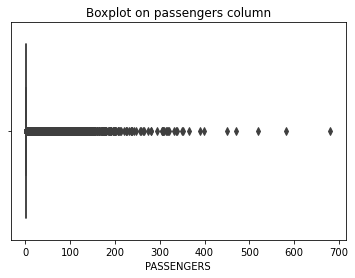

In [66]:
# generate a box plot to see the outliers in passengers column
sns.boxplot(data = tickets,x = 'PASSENGERS').set(title='Boxplot on passengers column')

In [67]:
# since a plane can only fit 200 passengers let us assume that the maximum nomber of people on an itenary can be 200(if they book the entire flight)
tickets = tickets[tickets['PASSENGERS']<200]

[Text(0.5, 1.0, 'Boxplot on passengers column')]

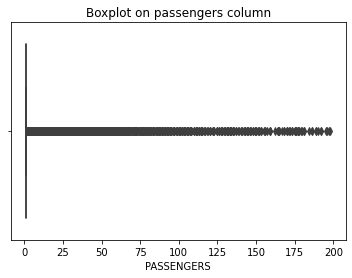

In [68]:
# recheck for outliers
sns.boxplot(data = tickets,x = 'PASSENGERS').set(title='Boxplot on passengers column')

In [69]:
# check the shape of the cleaned data frame
tickets.shape

(706799, 8)

In [70]:
# finding the 1st quartile
ITIN_FARE_q1 = np.quantile(tickets['ITIN_FARE'], 0.25)
 
# finding the 3rd quartile
ITIN_FARE_q3 = np.quantile(tickets['ITIN_FARE'], 0.75)
ITIN_FARE_med = np.median(tickets['ITIN_FARE'])
 
# finding the iqr region
iqr = ITIN_FARE_q3-ITIN_FARE_q1
 
# finding upper and lower whiskers
upper_bound = ITIN_FARE_q3+(1.5*iqr)
lower_bound = ITIN_FARE_q1-(1.5*iqr)

In [71]:
tickets = tickets[tickets['ITIN_FARE']<upper_bound]
tickets = tickets[tickets['ITIN_FARE']>lower_bound]

[Text(0.5, 1.0, 'Boxplot on fare to understand the distribution')]

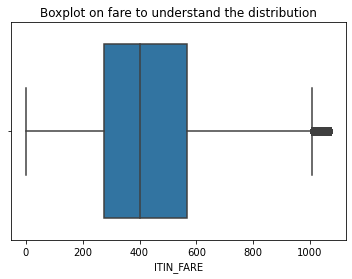

In [72]:
# check itenary fare for outliers 
sns.boxplot(data = tickets,x = 'ITIN_FARE').set(title='Boxplot on fare to understand the distribution')

There are outliers but we do not know if the value around $ 40,000 is completely wrong. It might be a last minute purchase. 

In [73]:
print("Shape of tickets data frame",tickets.shape)

Shape of tickets data frame (676148, 8)


In [74]:
# check the tickets data frame
tickets.head()

,ITIN_ID,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,ABI,TX,Texas,MQ,1,736.0,DAB
1,201912723085,ABI,TX,Texas,MQ,1,570.0,COS
2,201912723491,ABI,TX,Texas,MQ,1,564.0,MCO
3,201912723428,ABI,TX,Texas,MQ,1,345.0,LGA
11,201912723447,ABI,TX,Texas,MQ,1,425.0,LIT


In [75]:
# create a data frame with the counts grouped by origin for visualisations
origin_df = pd.DataFrame({'ORIGIN':pd.value_counts(flights['ORIGIN']).index, 'counts':pd.value_counts(flights['ORIGIN']).values})

[Text(0.5, 1.0, 'The number of tickets from each airport')]

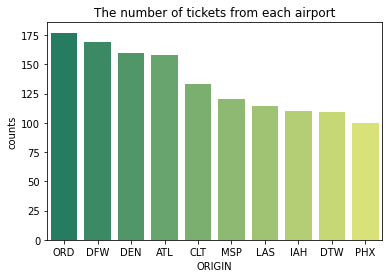

In [76]:
# generate a plot to show the airport where most tickets started
sns.barplot(data = origin_df[:10], x='ORIGIN',y = 'counts',palette = 'summer').set(title='The number of tickets from each airport')

From the visualisation most tickets are from Dallas and Chicago

In [77]:
# create a data frame with the counts grouped by origin for visualisations
origin_df = pd.DataFrame({'DESTINATION':pd.value_counts(flights['DESTINATION']).index, 'counts':pd.value_counts(flights['DESTINATION']).values})

[Text(0.5, 1.0, 'The number of tickets to each airport')]

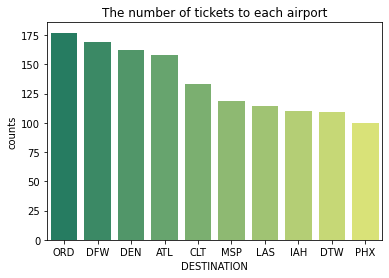

In [78]:
# generate a plot to show the airport where most tickets started
sns.barplot(data = origin_df[:10], x='DESTINATION',y = 'counts',palette = 'summer').set(title='The number of tickets to each airport')

# Data Munging

Data munging is joining that data to form a truth table. 

In [79]:
# Merge the flights and airports tables on ORIGIN 
merged_df = pd.merge(flights, airports, how='inner', left_on='ORIGIN', right_on='IATA_CODE')
merged_df = merged_df.rename(columns={
    'NAME': 'ORIGIN_AIRPORT_NAME', 
    'TYPE': 'ORIGIN_AIRPORT_TYPE'
}).drop(['IATA_CODE'], axis=1)

# Merge the resulting DataFrame with airports DataFrame again for destination airport details
merged_df = pd.merge(merged_df, airports, how='inner', left_on='DESTINATION', right_on='IATA_CODE')
merged_df = merged_df.rename(columns={
    'NAME': 'DEST_AIRPORT_NAME', 
    'TYPE': 'DEST_AIRPORT_TYPE'
}).drop(['IATA_CODE'], axis=1)

In [80]:
merged_df.columns

Index(['ORIGIN', 'DESTINATION', 'DISTANCE', 'DEP_DELAY', 'ARR_DELAY',
       'OCCUPANCY_RATE', 'num_flights', 'ORIGIN_AIRPORT_TYPE',
       'ORIGIN_AIRPORT_NAME', 'COORDINATES_x', 'DEST_AIRPORT_TYPE',
       'DEST_AIRPORT_NAME', 'COORDINATES_y'],
      dtype='object')

In [81]:
# Select the desired columns
selected_columns = [
    'ORIGIN', 'DESTINATION','num_flights', 'DISTANCE', 'DEP_DELAY',
       'ARR_DELAY', 'OCCUPANCY_RATE', 'ORIGIN_AIRPORT_TYPE',
       'ORIGIN_AIRPORT_NAME', 'COORDINATES_x','DEST_AIRPORT_TYPE',
       'DEST_AIRPORT_NAME','COORDINATES_y'
]

merged_flights_airports = merged_df[selected_columns]

In [82]:
merged_flights_airports.head()

,ORIGIN,DESTINATION,num_flights,DISTANCE,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,ORIGIN_AIRPORT_TYPE,ORIGIN_AIRPORT_NAME,COORDINATES_x,DEST_AIRPORT_TYPE,DEST_AIRPORT_NAME,COORDINATES_y
0,ABE,ATL,185,692,-1.800000,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367"
1,ABQ,ATL,156,1269,-1.217949,-12.544872,0.639551,large_airport,Albuquerque International Sunport,"-106.609001, 35.040199",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367"
2,ABY,ATL,224,145,-1.196429,-8.428571,0.654509,medium_airport,Southwest Georgia Regional Airport,"-84.19450378417969, 31.535499572753906",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367"
3,AEX,ATL,295,500,-5.152542,-13.738983,0.641525,medium_airport,Alexandria International Airport,"-92.54979705810547, 31.32740020751953",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367"
4,AGS,ATL,608,143,-4.136513,-12.828947,0.652961,large_airport,Augusta Regional At Bush Field,"-81.9645004272461, 33.36989974975586",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367"


In [83]:
# check the merged data frame size
merged_flights_airports.shape

(5668, 13)

In [84]:
final_merged_df = pd.merge(merged_flights_airports, tickets, left_on=['ORIGIN', 'DESTINATION'],
                           right_on=['ORIGIN', 'DESTINATION'], how='inner')

In [85]:
# remove redundant column(these columns do not give us any insight)
final_merged_df = final_merged_df.drop(['REPORTING_CARRIER','ORIGIN_STATE_ABR','ORIGIN_STATE_NM'],axis =1)

In [86]:
final_merged_df.head().T

,0,1,2,3,4
ORIGIN,ABE,ABE,ABE,ABE,ABE
DESTINATION,ATL,ATL,ATL,ATL,ATL
num_flights,185,185,185,185,185
DISTANCE,692,692,692,692,692
DEP_DELAY,-1.8,-1.8,-1.8,-1.8,-1.8
ARR_DELAY,-7.162162,-7.162162,-7.162162,-7.162162,-7.162162
OCCUPANCY_RATE,0.638432,0.638432,0.638432,0.638432,0.638432
ORIGIN_AIRPORT_TYPE,medium_airport,medium_airport,medium_airport,medium_airport,medium_airport
ORIGIN_AIRPORT_NAME,Lehigh Valley International Airport,Lehigh Valley International Airport,Lehigh Valley International Airport,Lehigh Valley International Airport,Lehigh Valley International Airport
COORDINATES_x,"-75.44080352783203, 40.652099609375","-75.44080352783203, 40.652099609375","-75.44080352783203, 40.652099609375","-75.44080352783203, 40.652099609375","-75.44080352783203, 40.652099609375"


In [87]:
print("Merged dataset shape: ",final_merged_df.shape)

Merged dataset shape:  (445043, 16)


## Analysis:
We have been asked to find insights for the following 


1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.

4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.

In [88]:
# create a origin-destination pair since we will only work on the routes and for ease of visualisation
# For this analysis we are concerned with round trips: therefore we can consider JFK->LAX and LAX-> JFK as one round trip
def create_route(row):
    return '-'.join(sorted([row['ORIGIN'], row['DESTINATION']]))
final_merged_df['trip_route'] = final_merged_df.apply(create_route,axis=1)

In [89]:
final_merged_df.shape

(445043, 17)

### 1. The 10 busiest round trip routes 
Finding the routes where passengers tend to book round trip flights is a good idea when the company wants to enter the aviation industry. 

In [90]:
final_merged_df.head()

,ORIGIN,DESTINATION,num_flights,DISTANCE,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,ORIGIN_AIRPORT_TYPE,ORIGIN_AIRPORT_NAME,COORDINATES_x,DEST_AIRPORT_TYPE,DEST_AIRPORT_NAME,COORDINATES_y,ITIN_ID,PASSENGERS,ITIN_FARE,trip_route
0,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",20191197,1,495.0,ABE-ATL
1,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",2019172,1,680.0,ABE-ATL
2,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",201911535774,1,656.0,ABE-ATL
3,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",2019166,2,628.0,ABE-ATL
4,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",large_airport,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",201913100162,1,366.0,ABE-ATL


In [91]:
# Group by origin and destination pairs, and count the number of passengers on these flights for each pair
route_counts = final_merged_df.groupby(['trip_route'])['num_flights'].value_counts()

In [92]:
route_counts

trip_route  num_flights
ABE-ATL     185            52
            193            32
ABE-CLT     221            26
            231            11
ABE-DTW     207            21
                           ..
SYR-TPA     23              9
TPA-TTN     66             24
            57             13
VPS-XNA     8              15
            10              4
Name: num_flights, Length: 5399, dtype: int64

Here 185 is the total number of flights which flew from ABE to ATL in the first quarter of 2019 and 193 flights flew from from ATL to ABE in the same time frame. 

Here 52 represents the number of itenaries which have this origin and destination. For example there are 52 itenaries which have tickets booked from ABE to ATL. 

In [93]:
route_counts_df = route_counts.reset_index(name='count_flights')

In [94]:
# reset the index to name the count column
route_counts = route_counts_df.groupby(['trip_route'])['num_flights'].sum().reset_index()

In [95]:
route_counts

,trip_route,num_flights
0,ABE-ATL,378
1,ABE-CLT,452
2,ABE-DTW,207
3,ABE-FLL,36
4,ABE-ORD,206
...,...,...
2782,STL-TPA,355
2783,STL-TUL,291
2784,SYR-TPA,49
2785,TPA-TTN,123


In [96]:
# sort the routes based on passenger count
route_counts = route_counts.sort_values(by = 'num_flights',ascending= False)

In [97]:
# These are the top 10 routes which passengers tend to book round trips. 
route_counts.head(10)

,trip_route,num_flights
2135,LAX-SFO,6194
2040,LAS-LAX,5437
2175,LGA-ORD,5176
1985,JFK-LAX,5159
1750,HNL-OGG,4625
2134,LAX-SEA,4240
188,ATL-MCO,4236
2579,PDX-SEA,4089
155,ATL-FLL,4034
184,ATL-LGA,3768


In [98]:
# we are onlt considering routes where atleast 2 flights were flown. Since we are looking into round trips only
route_counts = route_counts[route_counts['num_flights']>2]

Based on our analysis the above routes are the busiest routes (these routes have the highest number of round trip flights in the quarter).

The busiest route is from LAX(los angeles) to SFO(san francisco) with 6194 flights travelling between these airports.

### 2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes.

In [99]:
# create a column for revenues through baggage cost, fare
# baggage revenue for each trip
final_merged_df['baggage_revenue'] = (200*(final_merged_df['OCCUPANCY_RATE']/2))*35

In [100]:
# calculate operational cost
cost_per_mile_fuel_oil_maintenance_crew = 8.00
cost_per_mile_depreciation_insurance_other = 1.18
# airport operational cost 
airport_operational_cost = {
    'medium_airport': 5000,
    'large_airport': 10000
}
# cost added when delays occur
delay_cost_per_minute = 75
free_delay_minutes = 15



In [101]:
def calculate_flight_cost(row):
    distance = row['DISTANCE']
    # cost per mile
    per_mile_cost = distance*(cost_per_mile_fuel_oil_maintenance_crew+cost_per_mile_depreciation_insurance_other)
    
    # operational cost for each route
    origin_airport_cost = airport_operational_cost.get(row['ORIGIN_AIRPORT_TYPE'], 0)
    destination_airport_cost = airport_operational_cost.get(row['DEST_AIRPORT_TYPE'], 0)
    total_airport_cost = origin_airport_cost + destination_airport_cost
    
    # Delay costs
    dep_delay_minutes = max(0, row['DEP_DELAY'] - free_delay_minutes)
    arr_delay_minutes = max(0, row['ARR_DELAY'] - free_delay_minutes)
    total_delay_cost = delay_cost_per_minute * (dep_delay_minutes + arr_delay_minutes)
    
    total_cost = (per_mile_cost + total_airport_cost + total_delay_cost)
    return total_cost

final_merged_df['COST_operational'] = final_merged_df.apply(calculate_flight_cost,axis =1)
# each round trips operational cost

In [102]:
# cost each ticket was bought at. These values will change for each itenary 
# amount paid by each customer for each round trip
final_merged_df['ticket_revenue'] = (final_merged_df['PASSENGERS']*final_merged_df['ITIN_FARE'])/2

In [103]:
final_merged_df = pd.merge(final_merged_df, route_counts, left_on=['trip_route'],
                           right_on=['trip_route'], how='inner')
final_merged_df.head()

,ORIGIN,DESTINATION,num_flights_x,DISTANCE,DEP_DELAY,ARR_DELAY,OCCUPANCY_RATE,ORIGIN_AIRPORT_TYPE,ORIGIN_AIRPORT_NAME,COORDINATES_x,...,DEST_AIRPORT_NAME,COORDINATES_y,ITIN_ID,PASSENGERS,ITIN_FARE,trip_route,baggage_revenue,COST_operational,ticket_revenue,num_flights_y
0,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",...,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",20191197,1,495.0,ABE-ATL,2234.513514,21352.56,247.5,378
1,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",...,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",2019172,1,680.0,ABE-ATL,2234.513514,21352.56,340.0,378
2,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",...,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",201911535774,1,656.0,ABE-ATL,2234.513514,21352.56,328.0,378
3,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",...,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",2019166,2,628.0,ABE-ATL,2234.513514,21352.56,628.0,378
4,ABE,ATL,185,692,-1.8,-7.162162,0.638432,medium_airport,Lehigh Valley International Airport,"-75.44080352783203, 40.652099609375",...,Hartsfield Jackson Atlanta International Airport,"-84.428101, 33.6367",201913100162,1,366.0,ABE-ATL,2234.513514,21352.56,183.0,378


In [104]:
# we are interested in finding out the best roundtrip routes so we need to know information based on each round trip and 
# their corresponding profit, and delay times

# grouping on trip-route ensures that we are considering JFK-LAX and LAX-JFK as a single round trip

group_df = final_merged_df.groupby('trip_route').agg({
    'baggage_revenue':'mean',
    'COST_operational':'mean',
    'ITIN_FARE':'mean',
    'OCCUPANCY_RATE':'mean',
    'DEP_DELAY':'mean',
    'ARR_DELAY':'mean',
    'num_flights_y':'mean',
    'PASSENGERS':'sum'
}).reset_index()

# Rename columns for clarity
group_df = group_df.rename(columns={'ITIN_FARE':'Avg_Fare','num_flights_y':'num_flight_trips'})


group_df.head()

,trip_route,baggage_revenue,COST_operational,Avg_Fare,OCCUPANCY_RATE,DEP_DELAY,ARR_DELAY,num_flight_trips,PASSENGERS
0,ABE-ATL,2273.494795,21352.56,550.583333,0.649570,-1.633407,-7.966905,378.0,93
1,ABE-CLT,2301.459989,19415.58,491.135135,0.657560,-3.313498,-5.068590,452.0,51
2,ABE-DTW,2270.289855,18901.50,385.809524,0.648654,-2.360248,-11.550035,207.0,99
3,ABE-FLL,1958.564241,24556.38,248.734375,0.559590,-0.402670,-4.421730,36.0,100
4,ABE-ORD,2286.018328,21003.72,548.354839,0.653148,-5.397996,-12.847825,206.0,39


From the above head snippet we can see that the number of flights from ABE- ATL are 378 and the number of passengers on this route are 93 which means the occupancy rate on these flights should be 0.25% but the occupancy rate is listed as 0.64%. 

This means there is a clear case of missing data. We do not have all the tickets for passengers who travelled on these flights. In that case we can use occupancy rate to understand the revenue generated by tickets instead of number of passengers. 

Additionally the fact that we used occupancy rate to calculate baggage revenue supports or decision. 

In [105]:
# Calcualte ticket revenue generated for that flight route over the first quarter
group_df['ticket_revenue'] = group_df['OCCUPANCY_RATE']*200*group_df['Avg_Fare']

In [106]:
# Calculate profit for a round trip 
group_df['PROFIT'] = (2*(group_df['baggage_revenue']+group_df['ticket_revenue'])-group_df['COST_operational'])/group_df['num_flight_trips']

In [107]:
# Sort the data frame so that we understand the best routes possible
group_df = group_df.sort_values(by='PROFIT', ascending=False)
group_df.head(10)

,trip_route,baggage_revenue,COST_operational,Avg_Fare,OCCUPANCY_RATE,DEP_DELAY,ARR_DELAY,num_flight_trips,PASSENGERS,ticket_revenue,PROFIT
1566,EYW-LGA,2921.153846,26080.260,551.961538,0.834615,-3.384615,-28.615385,3.0,26,92135.118343,54677.428126
146,ATL-ELM,2332.884615,21582.060,522.230769,0.666538,-5.230769,-15.615385,3.0,13,69617.378698,40772.822209
1813,IAD-MHT,2444.166667,23837.240,445.500000,0.698333,-8.833333,-5.333333,3.0,2,62221.500000,35164.697778
1714,GSP-SJC,2736.300000,40674.980,441.240000,0.781800,2.200000,9.400000,3.0,32,68992.286400,34260.730933
573,BRO-DEN,2495.000000,24629.820,493.857143,0.712857,-3.357143,-2.107143,4.0,7,70409.918367,30295.004184
1144,DEN-FLG,2252.115385,19617.540,375.346154,0.643462,-5.038462,-10.846154,3.0,54,48304.162722,27165.005404
1206,DEN-PBI,2702.788462,35413.220,438.681319,0.772225,-5.379121,-21.381868,4.0,119,67752.160367,26374.169414
566,BOS-SMF,2324.402655,44198.480,445.061947,0.664115,-4.592920,-18.482301,3.0,118,59114.466912,26226.419711
752,CHS-STL,2325.602410,26481.080,369.361446,0.664458,-3.666667,-9.815261,3.0,90,49085.021048,25446.722305
286,AUS-ONT,2450.729167,31288.655,346.093750,0.700208,15.062500,8.041667,3.0,118,48467.545573,23515.964826


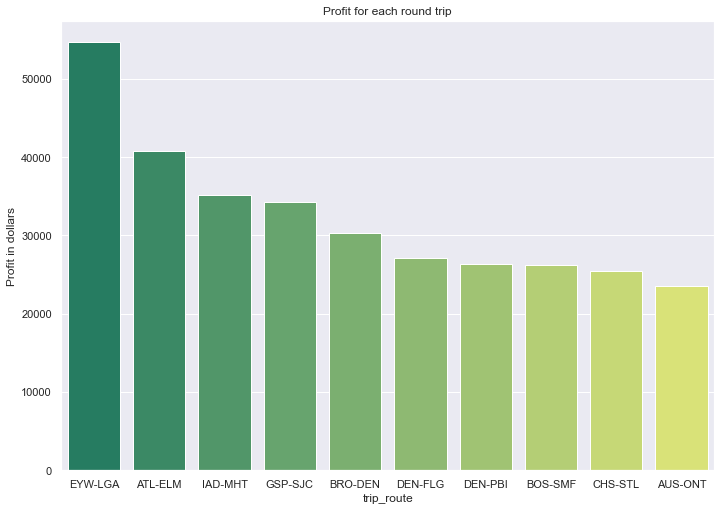

In [108]:
from matplotlib import pyplot as plt
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
pbp = sns.barplot(data = group_df[:10],x = 'trip_route',y='PROFIT',palette = "summer")
pbp.set(ylabel='Profit in dollars',title='Profit for each round trip')
plt.show()

[Text(0.5, 1.0, 'Boxplot to visualise summary statistics')]

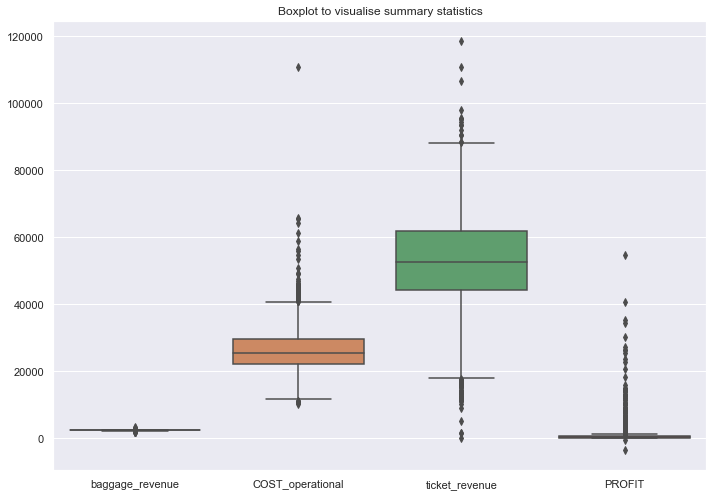

In [109]:
sns.boxplot(data = group_df[['baggage_revenue','COST_operational','ticket_revenue','PROFIT']]).set(title='Boxplot to visualise summary statistics')

### 3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.

In [110]:
# normalize column to get a calculate a combined scrore
# the score generated will be out of 3 and considers key indicators such as delays,occupancy rate and profit and revenue
group_df['score'] = ( group_df['PROFIT'] / group_df['PROFIT'].max()  +
                      group_df['OCCUPANCY_RATE']/group_df['OCCUPANCY_RATE'].max()+
                      group_df['Avg_Fare']/group_df['Avg_Fare'].max()
                    )


In [111]:
group_df

,trip_route,baggage_revenue,COST_operational,Avg_Fare,OCCUPANCY_RATE,DEP_DELAY,ARR_DELAY,num_flight_trips,PASSENGERS,ticket_revenue,PROFIT,score
1566,EYW-LGA,2921.153846,26080.26,551.961538,0.834615,-3.384615,-28.615385,3.0,26,92135.118343,54677.428126,2.496987
146,ATL-ELM,2332.884615,21582.06,522.230769,0.666538,-5.230769,-15.615385,3.0,13,69617.378698,40772.822209,2.030793
1813,IAD-MHT,2444.166667,23837.24,445.500000,0.698333,-8.833333,-5.333333,3.0,2,62221.500000,35164.697778,1.877710
1714,GSP-SJC,2736.300000,40674.98,441.240000,0.781800,2.200000,9.400000,3.0,32,68992.286400,34260.730933,1.945473
573,BRO-DEN,2495.000000,24629.82,493.857143,0.712857,-3.357143,-2.107143,4.0,7,70409.918367,30295.004184,1.857329
...,...,...,...,...,...,...,...,...,...,...,...,...
2029,LAS-LAX,2274.418286,22166.48,239.419397,0.649834,-0.817751,-5.511031,5437.0,2951,31116.563134,8.205901,0.956314
663,BWI-PHL,2369.114833,20826.20,11.000000,0.676890,-5.641148,-10.358852,209.0,1,1489.157895,-62.725620,0.732574
716,CDV-YAK,2223.750000,11955.34,11.000000,0.635357,-7.875000,-4.875000,56.0,2,1397.785714,-84.147653,0.687905
495,BNA-TTN,1920.187500,21481.08,47.500000,0.548625,-5.831250,-8.775000,13.0,18,5211.937500,-555.140769,0.626981


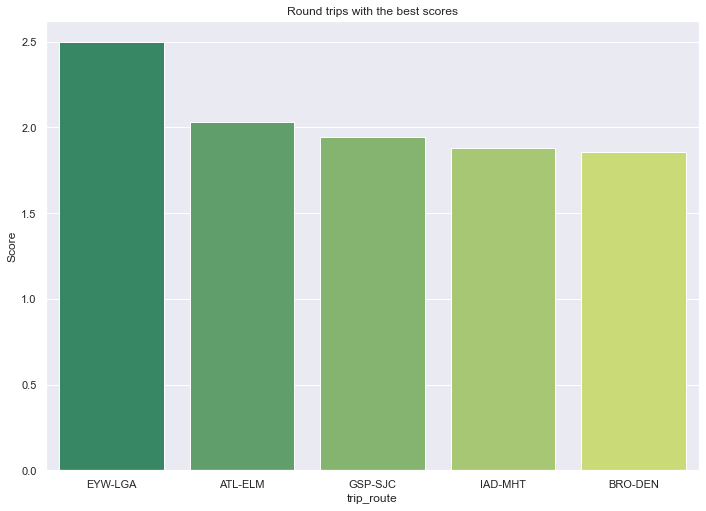

In [112]:
# Trip routes to invest in based on score

group_df = group_df.sort_values(by='score', ascending=False)
#sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

pbp = sns.barplot(data = group_df[:5],x = 'trip_route',y='score',palette = "summer")
pbp.set(ylabel='Score',title='Round trips with the best scores')
plt.show()

In [113]:
group_df['total_revenue'] = group_df['ticket_revenue']+group_df['baggage_revenue']
group_df['total_cost'] = group_df['COST_operational']
group_df[['trip_route','OCCUPANCY_RATE','total_revenue','total_cost']].head(5).describe()

,OCCUPANCY_RATE,total_revenue,total_cost
count,5.000000,5.000000,5.000000
mean,0.738829,75261.141387,27360.872000
std,0.068121,11544.521789,7618.640538
min,0.666538,64665.666667,21582.060000
25%,0.698333,71728.586400,23837.240000
50%,0.712857,71950.263314,24629.820000
75%,0.781800,72904.918367,26080.260000
max,0.834615,95056.272189,40674.980000


### 4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trips recommended.

In [114]:
# since the upfront cost is 90 million and the rpofit we calculated was for each trip
group_df['breakeven_trips'] = 90000000/group_df['PROFIT']

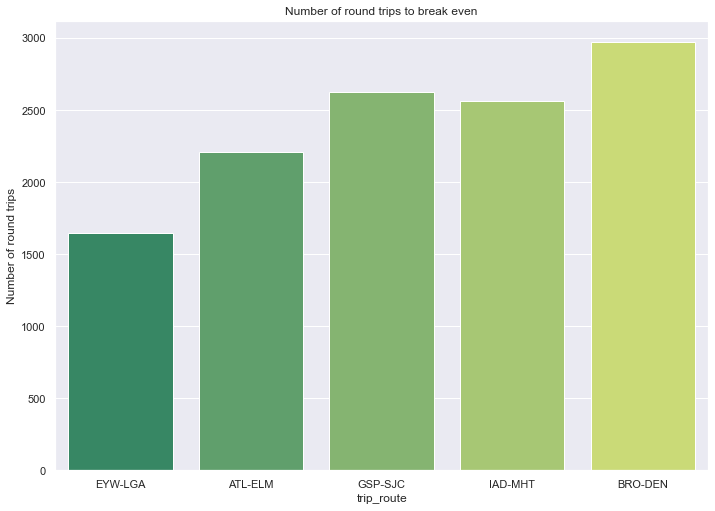

In [115]:
pbp = sns.barplot(data = group_df[:5],x = 'trip_route',y='breakeven_trips',palette = "summer")
pbp.set(ylabel='Number of round trips',title='Number of round trips to break even')
plt.show()

In [116]:
# show the summary statistics for the metrics used in calculating the score. 
group_df[['baggage_revenue','PROFIT','OCCUPANCY_RATE','num_flight_trips']].head(5).describe()

,baggage_revenue,PROFIT,OCCUPANCY_RATE,num_flight_trips
count,5.000000,5.000000,5.000000,5.000000
mean,2585.901026,39034.136646,0.738829,3.200000
std,238.423590,9511.387797,0.068121,0.447214
min,2332.884615,30295.004184,0.666538,3.000000
25%,2444.166667,34260.730933,0.698333,3.000000
50%,2495.000000,35164.697778,0.712857,3.000000
75%,2736.300000,40772.822209,0.781800,3.000000
max,2921.153846,54677.428126,0.834615,4.000000


[Text(0, 0.5, 'Values'),
 Text(0.5, 1.0, 'Boxplots on metrics used to calculate score')]

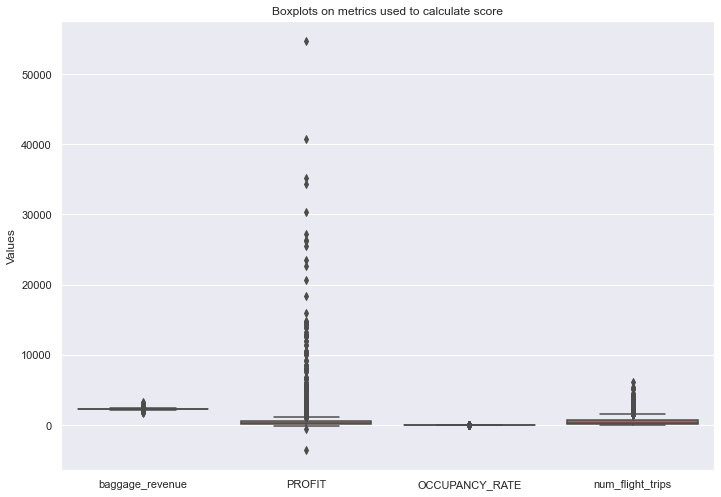

In [117]:
sns.boxplot(data = group_df[['baggage_revenue','PROFIT','OCCUPANCY_RATE','num_flight_trips']]).set(ylabel='Values',title='Boxplots on metrics used to calculate score')

### 5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

#### Key Performance Indicators

1. Make sure that the flights are not getting cancelled. We did not consider cancelled flights but tracking and using this data might help the airline to reduce cancellations and increase profits. 

2. Monitor departure and arrival delays to maintain punctuality. 

3. Analyse fare prices according to date of booking to understand trends in fare prices. 

4. Delay reasons to understand why flights are getting delayed so that we can predict future delays.


## Key insights and final recommendation



1. Most flights have departure and arrival delays less than 15 minutes.

2. The number of medium size airports is 4 times the number of large airports as per our data. 

3. Most tickets have origins or destinations as a large airport. One reason for this can be connecting flights. Airlines have hubs where they connect medium airports to large airports so that they can use bigger flights between large airports and smaller flights between less travelled airports. These large airports are one of the following (Chicago-ORD, Dallas-DFW,Denver-DEN, Atlanta-ATL).

4. The number of flights travelled between LAX(los angeles) and SFO(san francisco) is the highest at 6914. This means an average of 3 flights travelled between these airports each hour. 

5. The most profitable round trip route is EYW(Key west, Florida)- LGA(Laguardia, NY). The profit on one round trip is $54k.

6. The 5 round trips we suggest to invest in are :

    - EYW(Key West, Florida) - LGA(Laguardia, NY)
    - GSP(Greenville, South Carolina) - SJC(San Jose, CA)
    - ATL(Atlanta, GA) - ELM(Elmira Corning, NY)
    - IAD(DC, Virginia)- MHT(Manchester, NH)
    - BRO(Brownsville,TX) - DEN(Denver, CO)
    
7. A minimum of 1500 round trips need to be made to break even. 

## Next Steps

1. Flight combinations (on the same plane) involving three or more airports should be studied. Our current assumptions are limited and should be modified to allow for further data study.

2. Conduct the analysis with shorter time intervals to determine which flights are the most profitable. Smaller timer intervals, such as monthly, could be explored to determine which routes produce the most profit per fixed time interval.

3. Other datasets should be utilized to fill in the missing information (for example, the IATA_CODE column in the airports dataset). Since we are filtering out invalid airport codes, we are missing a large number of data values to examine for analysis.

4. Weather Data: Compile historical weather data using factors such as temperature, precipitation, wind speed, and visibility. Weather conditions play a key role in flight delays, and integrating this data can help enhance model accuracy.

5. Economic statistics: Consider including economic statistics like fuel prices or economic activity indexes, which might have an impact on flight frequency, ticket prices, or delays.

6. Include categorical factors such as weekday, season, and holiday indications.

7. Create an automated data pipeline that enable continuous data integration, cleansing, and updating of models and dashboards.

8. Model Monitoring and Retraining: Implement a system for tracking model performance over time and retraining models as new data becomes available.

9. Interactive dashboard for leadership. This dashboard can represent the key metrics,predictive model outputs and geographic data. 